# Tu primer árbol de decisión con scikit-learn

In [2]:
#Importamos las librerias principales
import pandas as pd
import matplotlib.pyplot as plt

Utilizaremos el **dataset Titanic** de Standford: https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/problem12.html

In [8]:
#Cargamos dataset a utilizar
titanic = pd.read_csv('../data/titanic.csv')
titanic

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


## Exploración de datos

In [9]:
#Visualizacion del DataFrame
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [10]:
#Eliminamos las columnas que no nos interesan
columns_to_drop = ['Name', 'Fare']      # Name no aporta info y fare da informacion redundante, pues pc_class está relacionada
titanic.drop(columns_to_drop, axis=1, inplace=True)

In [12]:
#Renombramos las columnas
titanic.columns = ['Survided', 'PClass', 'Sex', 'Age', 'SibSp', 'Parch']
titanic.head()

,Survided,PClass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [13]:
#Analizamos el shape del objeto
titanic.shape

(887, 6)

In [14]:
#Visualizamos los tipos de datos
titanic.dtypes

Survided      int64
PClass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
dtype: object

In [17]:
#Cambiamos los tipos de datos
## Vamos a comvertir Sex en numerico

titanic = pd.get_dummies(titanic, columns=['Sex'], drop_first=True)

In [18]:
titanic.dtypes

Survided      int64
PClass        int64
Age         float64
SibSp         int64
Parch         int64
Sex_male       bool
dtype: object

In [19]:
titanic.head()


,Survided,PClass,Age,SibSp,Parch,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True


In [20]:
#Reemplazar el DataFrame
titanic.rename(columns={'Sex_male':'Sex'}, inplace=True)

In [21]:
#Ordenar columnas por nombres
titanic = titanic[['Survided', 'PClass', 'Sex', 'Age', 'SibSp', 'Parch']]

## Entrenamiento de árbol de decisión con scikit-learn

In [22]:
#Separamos en X e y
X, y = titanic.drop('Survided', axis=1), titanic['Survided']

In [23]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=00000)

In [25]:
#Arbol de Decision
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=00000)

In [26]:
#Entrenamiento

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluación del modelo

In [27]:
#Calculo de las predicciones en Train y Test
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [28]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy = accuracy_score(y_train, y_train_pred)

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('El accuracy en train es : ', train_accuracy)
print('El accuracy en test es : ', test_accuracy)

El accuracy en train es :  0.8048387096774193
El accuracy en test es :  0.7640449438202247


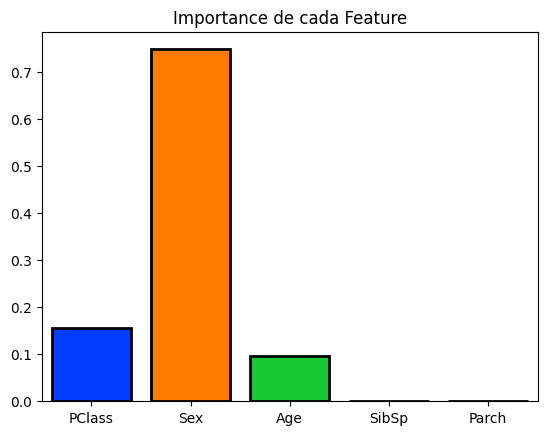

In [30]:
#Verificamos el feature importances
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns

data = pd.DataFrame([importances], columns=columns)

sns.barplot(data, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importance de cada Feature')
plt.show()

**¿Que podemos llevarnos de este ejemplo?**

Podemos observar que para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Pclass y luego de Age. Tambien es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test, lo cual es claramente positivo para nuestro modelo. 